In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
x = pd.DataFrame(data.data, columns=[data.feature_names])
y = pd.Series(data.target)

In [4]:
x.columns.dtypes

level_0    object
dtype: object

In [5]:

#Transformar o MultiIndex em um Index simples
x.columns = ['_'.join(map(str, col)) for col in x.columns.to_flat_index()]

In [6]:
x.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)

model = LogisticRegression(C=95, penalty='l1', solver='liblinear')
model.fit(x_train, y_train)
result = model.score(x_test, y_test)
result

0.9766081871345029

In [8]:
predict = model.predict(x_test)
predict

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [9]:
predict = model.predict_proba(x_test)
predict

array([[7.92783153e-01, 2.07216847e-01],
       [1.11620621e-01, 8.88379379e-01],
       [1.00000000e+00, 2.89409276e-14],
       [1.07492803e-01, 8.92507197e-01],
       [1.92063985e-05, 9.99980794e-01],
       [1.00000000e+00, 2.36168234e-20],
       [1.00000000e+00, 5.25635999e-15],
       [1.00000000e+00, 2.20533476e-11],
       [4.33095153e-06, 9.99995669e-01],
       [9.99999993e-01, 6.70748986e-09],
       [1.00000000e+00, 2.84150562e-14],
       [1.93286667e-05, 9.99980671e-01],
       [3.68563939e-06, 9.99996314e-01],
       [5.20026886e-05, 9.99947997e-01],
       [9.99999887e-01, 1.13085662e-07],
       [1.69087050e-02, 9.83091295e-01],
       [2.84629276e-06, 9.99997154e-01],
       [2.97460408e-02, 9.70253959e-01],
       [1.67086746e-06, 9.99998329e-01],
       [3.18234509e-07, 9.99999682e-01],
       [1.00000000e+00, 2.17027889e-35],
       [3.03155459e-07, 9.99999697e-01],
       [9.78476620e-04, 9.99021523e-01],
       [1.00000000e+00, 1.69993078e-10],
       [8.606187

In [10]:
probs = predict[:,1] # contém as probabilidades da classe positiva (1).
probs

array([2.07216847e-01, 8.88379379e-01, 2.89409276e-14, 8.92507197e-01,
       9.99980794e-01, 2.36168234e-20, 5.25635999e-15, 2.20533476e-11,
       9.99995669e-01, 6.70748986e-09, 2.84150562e-14, 9.99980671e-01,
       9.99996314e-01, 9.99947997e-01, 1.13085662e-07, 9.83091295e-01,
       9.99997154e-01, 9.70253959e-01, 9.99998329e-01, 9.99999682e-01,
       2.17027889e-35, 9.99999697e-01, 9.99021523e-01, 1.69993078e-10,
       9.99139381e-01, 9.94743008e-01, 9.98447533e-01, 9.99999993e-01,
       9.99997719e-01, 1.99680637e-14, 9.50493497e-14, 9.92372704e-01,
       8.21178342e-04, 6.84734975e-03, 2.57249596e-07, 1.34442832e-13,
       3.71620706e-15, 9.95735025e-01, 7.82781168e-08, 9.99996138e-01,
       5.84856967e-01, 7.39665631e-01, 9.99839237e-01, 9.99985395e-01,
       9.99948316e-01, 9.99999674e-01, 2.70899057e-01, 3.23087906e-21,
       8.62307609e-01, 5.23377955e-05, 2.41372731e-01, 9.99352835e-01,
       9.99995368e-01, 9.99993804e-01, 2.79177100e-17, 9.99715021e-01,
      

In [11]:
from sklearn.metrics import roc_curve
# fpr = false positve rates
# tpr = true positive rates
# thresholds = point in the sigmoid function
fpr, tpr, thresholds = roc_curve(y_test, probs)
print(fpr, '\n', tpr, '\n', thresholds )

[0.         0.         0.         0.01612903 0.01612903 0.03225806
 0.03225806 0.0483871  0.0483871  0.09677419 0.09677419 1.        ] 
 [0.         0.00917431 0.91743119 0.91743119 0.95412844 0.95412844
 0.98165138 0.98165138 0.99082569 0.99082569 1.         1.        ] 
 [           inf 9.99999998e-01 9.32085217e-01 9.22003321e-01
 8.92507197e-01 8.88379379e-01 7.36918732e-01 6.73091392e-01
 5.84856967e-01 2.41372731e-01 2.14263273e-01 2.53252935e-46]


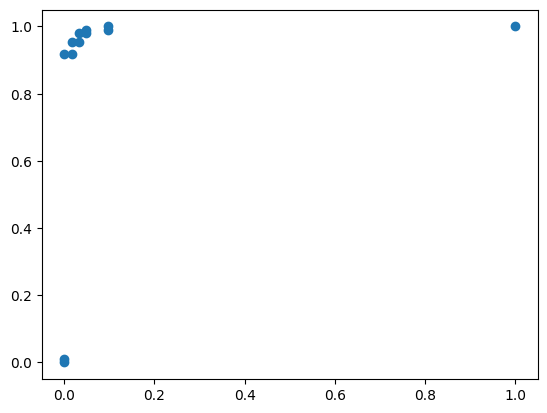

In [12]:
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
auc

0.9971885173128144

In [19]:
# Encontrar o melhor ponto
import numpy as np
distances = np.sqrt(fpr**2 + (1 - tpr)**2)  # Distância ao ponto (0,1)
best_index = np.argmin(distances)
best_fpr = fpr[best_index]
best_tpr = tpr[best_index]

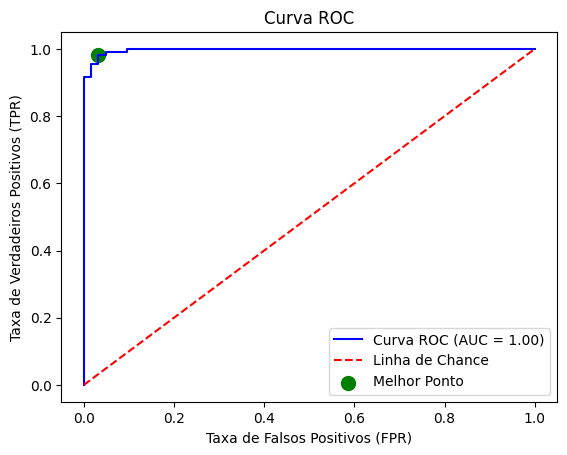

Best FPR: 0.03225806451612903
Best TPR: 0.981651376146789
Threshold: 0.736918732149172


In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linha de Chance')  # Linha de chance
plt.scatter(best_fpr, best_tpr, color='green', s=100, label='Melhor Ponto')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Exibir informações do melhor ponto
print(f'Best FPR: {best_fpr}\nBest TPR: {best_tpr}\nThreshold: {thresholds[best_index]}')
